In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score

In [8]:
%matplotlib inline
rcParams['figure.figsize'] = 7, 4

## Load Delivery Fleet Dataset

In [9]:
delivery = pd.read_csv(filepath_or_buffer='../samples/delivery_fleet_data.csv',sep='\t')
delivery.head()

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


## Plot Scattered Diagram for Distance and Speeding

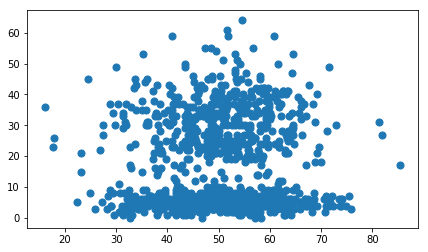

In [10]:
plt.scatter(x=delivery['Distance_Feature'], y=delivery['Speeding_Feature'],s=50)

### Select the best K

In [11]:
Sum_of_squared_distances = []
Silhouette_score = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(delivery)
    
    Sum_of_squared_distances.append( km.inertia_ )
    if k == 1:
        Silhouette_score.append( np.nan )
    else:
        Silhouette_score.append( silhouette_score( delivery, km.labels_ ) )

Text(0, 0.5, 'Silhouette_score')

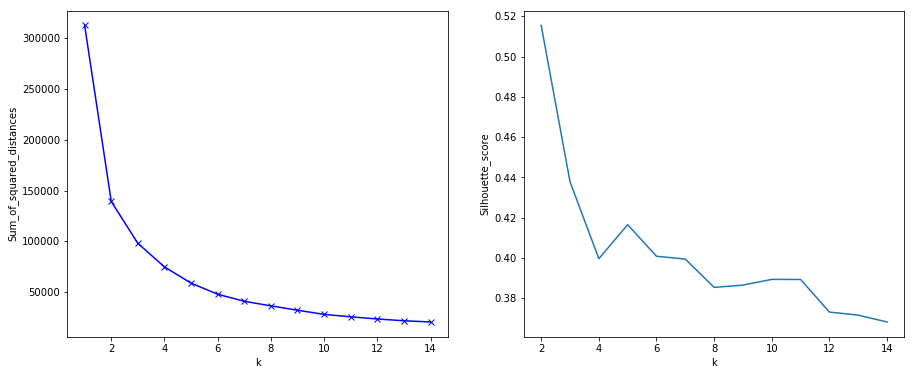

In [12]:
fig = plt.figure(figsize=[15,6])

ax1 = fig.add_subplot(1,2,1)
ax1.plot(K, Sum_of_squared_distances, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Sum_of_squared_distances')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(K, Silhouette_score)
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette_score')

## Clustering using the best K

In [13]:
# K = 2
clustering = KMeans(n_clusters = 2, random_state = 5)
clustering.fit(delivery)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

## Show the resulting clusters

Text(0.5, 1.0, 'K-Measn Classification')

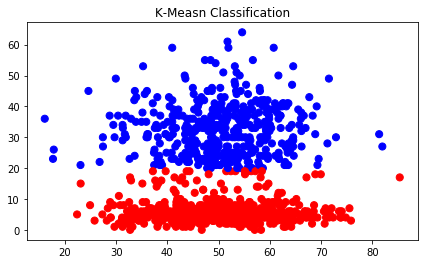

In [14]:
color_theme = np.array(['red','blue'])

plt.scatter(x=delivery['Distance_Feature'], y=delivery['Speeding_Feature'], c=color_theme[clustering.labels_], s=50)
plt.title('K-Measn Classification')

Text(0.5, 1.0, 'K-Measn Classification')

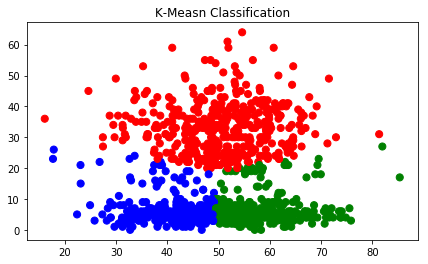

In [15]:
# K = 3
clustering = KMeans(n_clusters = 3, random_state = 5)
clustering.fit(delivery)
color_theme = np.array(['red','blue','green'])

plt.scatter(x=delivery['Distance_Feature'], y=delivery['Speeding_Feature'], c=color_theme[clustering.labels_], s=50)
plt.title('K-Measn Classification')

## Try Scaling

In [16]:
scaler = StandardScaler()

delivery_std = scaler.fit_transform(delivery)

In [17]:
Sum_of_squared_distances = []
Silhouette_score = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(delivery_std)
    
    Sum_of_squared_distances.append( km.inertia_ )
    if k == 1:
        Silhouette_score.append( np.nan )
    else:
        Silhouette_score.append( silhouette_score( delivery_std, km.labels_ ) )

Text(0, 0.5, 'Silhouette_score')

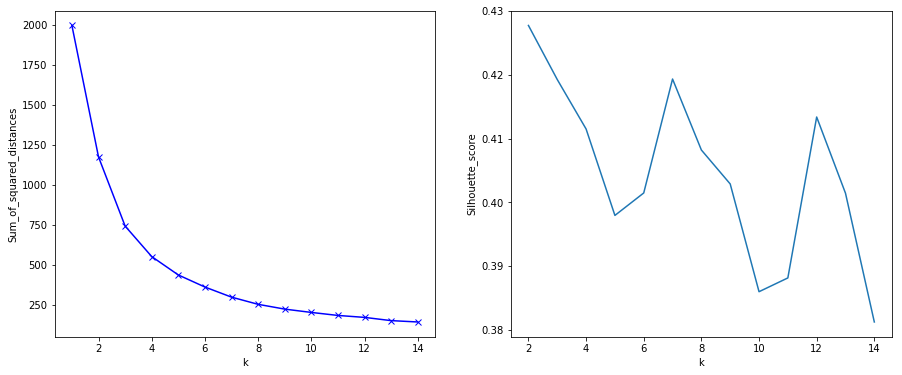

In [18]:
fig = plt.figure(figsize=[15,6])

ax1 = fig.add_subplot(1,2,1)
ax1.plot(K, Sum_of_squared_distances, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Sum_of_squared_distances')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(K, Silhouette_score)
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette_score')